In [1]:
#install library

!pip install pydotplus
!pip install wheel
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install seaborn

In [2]:
#import library

import pandas as pd
import sklearn
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\ACER\Downloads\xprizeai-ai-bank-marketing\data\bank.csv',header='infer')
data.head(10)

,Client_Num,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,False,1787,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,2,33,services,married,secondary,False,4789,True,True,cellular,11,may,220,1,339,4,failure,False
2,3,35,management,single,tertiary,False,1350,True,False,cellular,16,apr,185,1,330,1,failure,False
3,4,30,management,married,tertiary,False,1476,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,5,59,blue-collar,married,secondary,False,0,True,False,unknown,5,may,226,1,-1,0,unknown,False
5,6,35,management,single,tertiary,False,747,False,False,cellular,23,feb,141,2,176,3,failure,False
6,7,36,self-employed,married,tertiary,False,307,True,False,cellular,14,may,341,1,330,2,other,False
7,8,39,technician,married,secondary,False,147,True,False,cellular,6,may,151,2,-1,0,unknown,False
8,9,41,entrepreneur,married,tertiary,False,221,True,False,unknown,14,may,57,2,-1,0,unknown,False
9,10,43,services,married,primary,False,-88,True,True,cellular,17,apr,313,1,147,2,failure,False


In [4]:
#Check data types
data.dtypes

Client_Num     int64
age            int64
job           object
marital       object
education     object
default         bool
balance        int64
housing         bool
loan            bool
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y               bool
dtype: object

In [5]:
#create dummy variables for categorical data
df = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'contact','poutcome'])

In [6]:
df

,Client_Num,age,default,balance,housing,loan,day,month,duration,campaign,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,30,False,1787,False,False,19,oct,79,1,...,0,0,0,1,0,0,0,0,0,1
1,2,33,False,4789,True,True,11,may,220,1,...,1,0,0,1,0,0,1,0,0,0
2,3,35,False,1350,True,False,16,apr,185,1,...,0,1,0,1,0,0,1,0,0,0
3,4,30,False,1476,True,True,3,jun,199,4,...,0,1,0,0,0,1,0,0,0,1
4,5,59,False,0,True,False,5,may,226,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4517,33,False,-333,True,False,30,jul,329,5,...,1,0,0,1,0,0,0,0,0,1
4517,4518,57,True,-3313,True,True,9,may,153,1,...,0,1,0,0,0,1,0,0,0,1
4518,4519,57,False,295,False,False,19,aug,151,11,...,1,0,0,1,0,0,0,0,0,1
4519,4520,28,False,1137,False,False,6,feb,129,4,...,1,0,0,1,0,0,0,1,0,0


In [7]:
df.columns

Index(['Client_Num', 'age', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [8]:
#Check if there is any null data
df.isnull().sum()

Client_Num             0
age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
dtype: int64

## Decision Tree Model

In [9]:
#Define X,Y
Y = df['y']
X = df.drop(['Client_Num','day','month','y'],axis=1)

In [10]:
X

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,False,1787,False,False,79,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,33,False,4789,True,True,220,1,339,4,0,...,1,0,0,1,0,0,1,0,0,0
2,35,False,1350,True,False,185,1,330,1,0,...,0,1,0,1,0,0,1,0,0,0
3,30,False,1476,True,True,199,4,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,59,False,0,True,False,226,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,False,-333,True,False,329,5,-1,0,0,...,1,0,0,1,0,0,0,0,0,1
4517,57,True,-3313,True,True,153,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
4518,57,False,295,False,False,151,11,-1,0,0,...,1,0,0,1,0,0,0,0,0,1
4519,28,False,1137,False,False,129,4,211,3,0,...,1,0,0,1,0,0,0,1,0,0


In [11]:
Y

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Name: y, Length: 4521, dtype: bool

In [12]:
#Check unique data
np.unique(data['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [13]:
np.unique(data['marital'])

array(['divorced', 'married', 'single'], dtype=object)

In [14]:
np.unique(data['education'])

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [15]:
np.unique(data['contact'])

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [16]:
np.unique(data['poutcome'])

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [17]:
data.dtypes

Client_Num     int64
age            int64
job           object
marital       object
education     object
default         bool
balance        int64
housing         bool
loan            bool
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y               bool
dtype: object

In [18]:
# split into train test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3164, 35) (1357, 35) (3164,) (1357,)


In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_train, y_train)

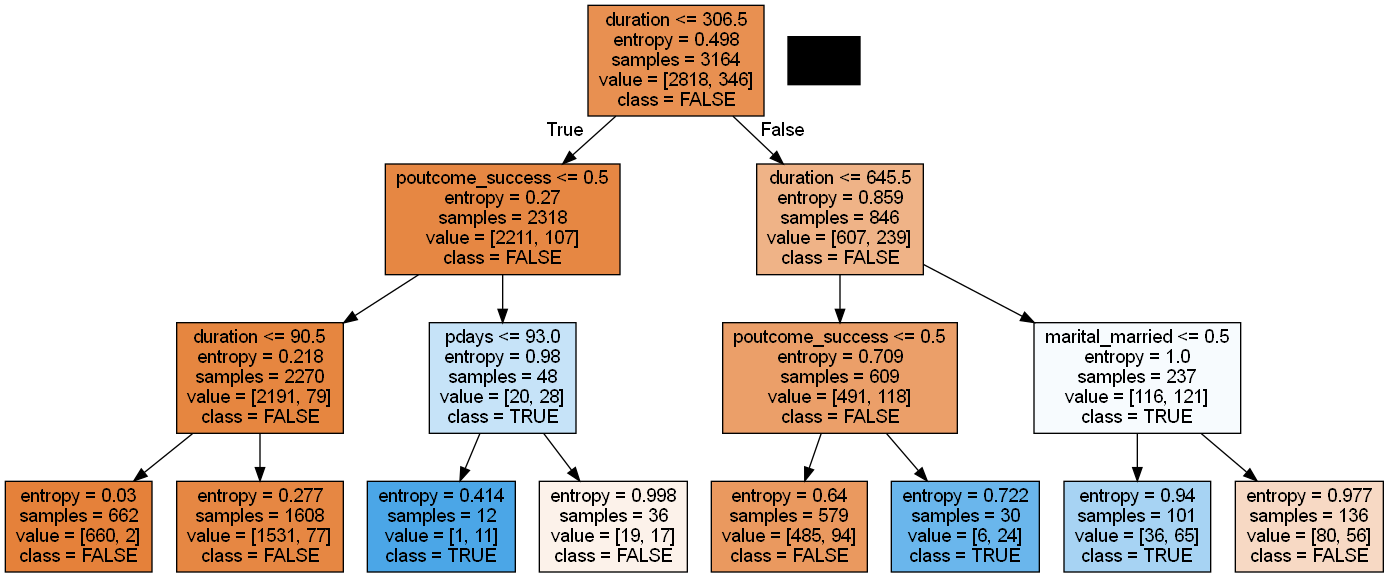

In [20]:
import pydotplus 
from IPython.display import Image
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['FALSE','TRUE'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [21]:
# make predictions
yhat = clf.predict(X_test)

from sklearn.metrics import accuracy_score
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.881


## Overfitting

Text(0, 0.5, 'Accuracy')

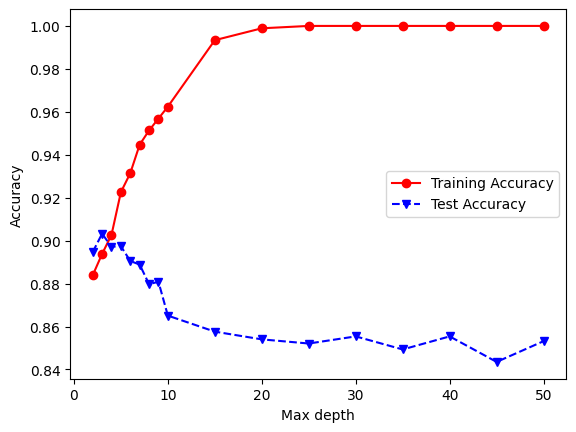

In [22]:
import matplotlib.pyplot as plt

# Training and Test set creation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score


#Model fitting and evaluation
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    

#Plot of training and test accuracies
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [23]:
#3 depth is the best fitting

## Ensemble

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log=LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train,y_train)
rnd=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
svm=SVC(gamma='auto').fit(X_train,y_train)
voting=VotingClassifier(estimators=[('lr',log), ('rf',rnd), ('svc',svm)],
                       voting='hard').fit(X_train,y_train)

In [25]:
print(log.score(X_test,y_test))
print(rnd.score(X_test,y_test))
print(svm.score(X_test,y_test))
print(voting.score(X_test,y_test))

0.8977052806192978
0.8927287807575338
0.8902405308266519
0.896599391761128


## KNN

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}

In [27]:
# find best model score
gs_knn.score(X_train, y_train)

0.8783185840707964

In [28]:
#Logistic regression is the best model for classification this dataset